In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn import metrics
from sklearn.compose import make_column_selector as selector
from sklearn.model_selection import cross_val_predict
import seaborn as sb
import random
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

import graphviz

import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 9)
plt.style.use('ggplot')


In [45]:
houses_df = pd.read_csv('train.csv', encoding='latin1')

houses_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Random Forest Regresor

In [46]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

# Assuming that 'SalePrice' is the name of your target variable
X = houses_df.drop('SalePrice', axis=1)
y = houses_df['SalePrice']

# Identify categorical and numerical columns
categorical_cols = [cname for cname in X.columns if X[cname].dtype == "object"]
numerical_cols = [cname for cname in X.columns if X[cname].dtype in ['int64', 'float64']]

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Bundle preprocessing and modeling code in a pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)
                     ])

# Split the data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing of training data, fit model 
clf.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
predictions = clf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print(f'Desviacion estandar: {np.std(y)}')
print(f'MSE: {mse}')
print(f'MAE: {mae}')

Desviacion estandar: 79415.29188606751
MSE: 812258875.561691
MAE: 17455.817671232875


Dividimos los datos entre nuestra variable objetivo y nuestros predictores, y convertimos todas las variables categoricas a valores numéricos

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor

house_df = pd.read_csv('train.csv', encoding='latin1')

# Define the target
y = house_df.pop('SalePrice')

# Remove the target from the current DataFrame
X = house_df

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(houses_df)
categorical_columns = categorical_columns_selector(houses_df)

# Convert categorical columns to numerical columns
encoder = OneHotEncoder(handle_unknown='ignore')
houses_encoded = encoder.fit_transform(houses_df[categorical_columns]).toarray()

# Combine numerical and encoded categorical columns
houses_combined = np.concatenate([houses_df[numerical_columns], houses_encoded], axis=1)

houses_combined

array([[1.000e+00, 6.000e+01, 6.500e+01, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [2.000e+00, 2.000e+01, 8.000e+01, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [3.000e+00, 6.000e+01, 6.800e+01, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [1.458e+03, 7.000e+01, 6.600e+01, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [1.459e+03, 2.000e+01, 6.800e+01, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [1.460e+03, 2.000e+01, 7.500e+01, ..., 0.000e+00, 1.000e+00,
        0.000e+00]])

Hacemos la división de los datos en entrenamiento y prueba y utilizamos el algoritmo de árbol de decisión de regresión.

In [48]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(houses_combined, y, test_size=0.3, train_size=0.7, random_state=123)

# Create a DecisionTreeRegressor object
regressor = DecisionTreeRegressor()

# Fit the model using the training data
regressor.fit(X_train, y_train)

# Make predictions using the testing data
predictions = regressor.predict(X_test)

Calculamos que tan exacto fueron las predicciones de nuestro árbol con los datos de prueba. 

De los cuales podemos ver que el MAE se encuentra dentro del rango de nuestros valores, incluso encontrándose por debajo de la desviación estándar de nuestra variable objetivo.

In [49]:
# Calculate MSE and RMSE

minimo = y.min()
print("Valor mínimo: ", minimo)
maximo = y.max()
print("Valor máximo: ", maximo)

std_dev = np.std(y)
print("Desviación estándar: ", std_dev)

varianza = np.var(y)
print("Varianza: ", varianza)

mse_test = mean_squared_error(y_test, predictions)
print("MSE (test):", mse_test)
mae_test = mean_absolute_error(y_test, predictions)
print("MAE (test):", mae_test)
rmse_test = np.sqrt(mse_test)
print("RMSE (test):", rmse_test)

Valor mínimo:  34900
Valor máximo:  755000
Desviación estándar:  79415.29188606751
Varianza:  6306788585.349299
MSE (test): 1436642343.6105623
MAE (test): 30337.655865647546
RMSE (test): 37903.06509519464


Ahora vamos a comparar diferentes modelos variando la profundidad del árbol de decisión

Comenzamos por el primer modelo, utilizando una profundidad de 2

In [50]:
arbol1 = DecisionTreeRegressor(max_depth=2, random_state=123)
arbol1 = arbol1.fit(X_train, y_train)

In [51]:
y_pred1 = arbol1.predict(X_test)

In [52]:
mse_test = mean_squared_error(y_test, y_pred1)
print("MSE (test):", mse_test)
mae_test = mean_absolute_error(y_test, y_pred1)
print("MAE (test):", mae_test)
rmse_test = np.sqrt(mse_test)
print("RMSE (test):", rmse_test)

MSE (test): 2289199695.1102524
MAE (test): 35343.52429387024
RMSE (test): 47845.58177209524


Para el segundo modelo le colocamos una profundidad de 6

In [53]:
arbol2 = DecisionTreeRegressor(max_depth=6, random_state=123)
arbol2 = arbol2.fit(X_train, y_train)

In [54]:
y_pred2 = arbol2.predict(X_test)

In [55]:
mse_test = mean_squared_error(y_test, y_pred2)
print("MSE (test):", mse_test)
mae_test = mean_absolute_error(y_test, y_pred2)
print("MAE (test):", mae_test)
rmse_test = np.sqrt(mse_test)
print("RMSE (test):", rmse_test)

MSE (test): 1411327574.5139854
MAE (test): 30394.096842964576
RMSE (test): 37567.63999127421


Y por último, para el tercero le colocamos una profundidad de 10

In [56]:
arbol3 = DecisionTreeRegressor(max_depth=10, random_state=123)
arbol3 = arbol3.fit(X_train, y_train)

In [57]:
y_pred3 = arbol3.predict(X_test)

In [58]:
mse_test = mean_squared_error(y_test, y_pred3)
print("MSE (test):", mse_test)
mae_test = mean_absolute_error(y_test, y_pred3)
print("MAE (test):", mae_test)
rmse_test = np.sqrt(mse_test)
print("RMSE (test):", rmse_test)

MSE (test): 1407589868.9553761
MAE (test): 30340.970963362513
RMSE (test): 37517.86066602647


Podemos ver que mientras más profundidad tenga el árbol, menor es el error que existe entre las predicciones de nuestro árbol.

Dividimos las casas en nuestro set de datos en tres grupos: Economica, Intermedia y Cara. Esto lo hacemos haciendo uso de qcut(), la cual es una función que va asignando valores a los grupos de forma ascendente, midiéndolos por puntos u objetos en cada grupo. Con el objetivo que nuestros grupos tengan la misma cantidad de datos, en lo posible, en cada grupo.

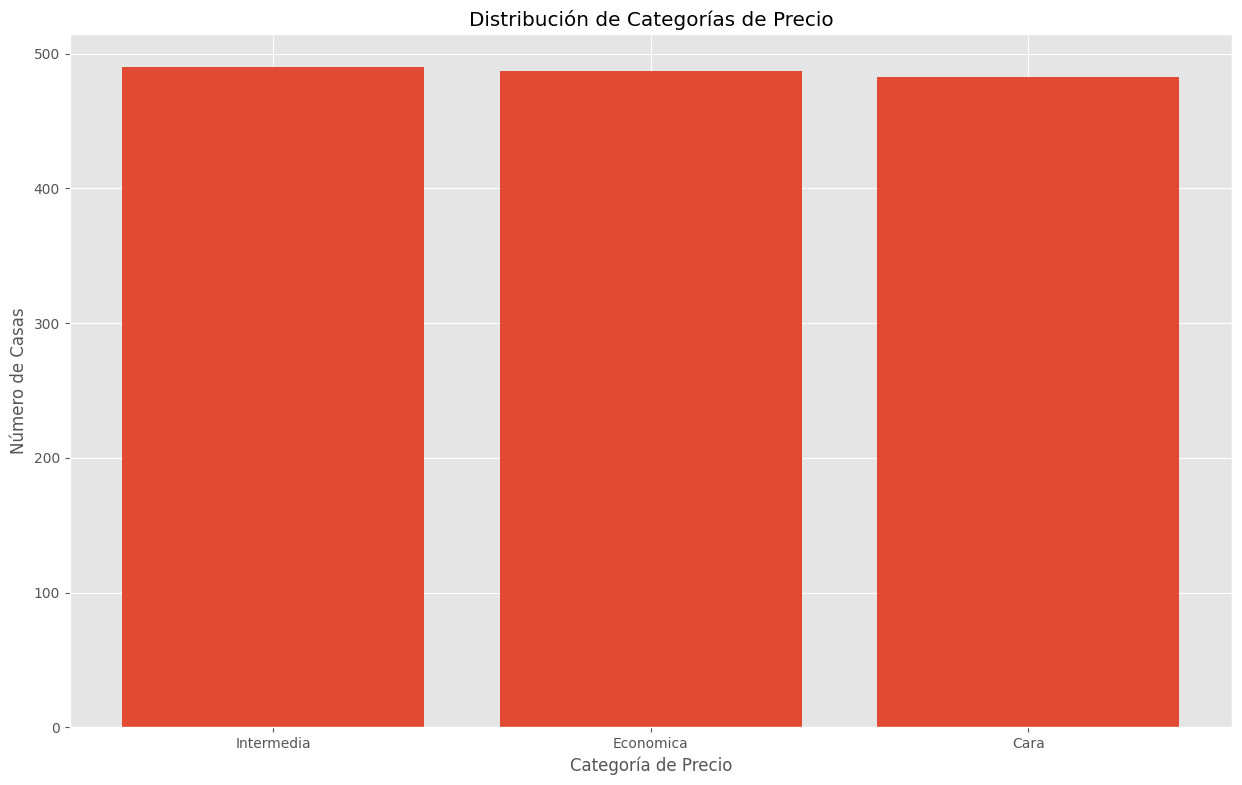

In [59]:
houses_df = pd.read_csv('train.csv', encoding='latin1')

# Define the number of categories
num_categories = 3

# Define the category names
category_names = ['Economica', 'Intermedia', 'Cara']

# Create a new column in the DataFrame for the categories
houses_df['Precio_Categoria'] = pd.qcut(houses_df['SalePrice'], q=num_categories, labels=category_names)

# Verificar la distribución de las categorías
plt.bar(houses_df['Precio_Categoria'].value_counts().index, houses_df['Precio_Categoria'].value_counts().values)
plt.xlabel('Categoría de Precio')
plt.ylabel('Número de Casas')
plt.title('Distribución de Categorías de Precio')
plt.show()

In [60]:
houses_df['Precio_Categoria'] = houses_df['Precio_Categoria'].astype('category')

Como podemos ver nuestros datos se encuentran bastante bien distribuidos, teniendo una diferencia máxima de 7 integrantes.

In [61]:
houses_df.groupby('Precio_Categoria').size()

Precio_Categoria
Economica     487
Intermedia    490
Cara          483
dtype: int64

Cambiamos dicha variable, categórica, a una variable numérica

In [62]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the 'Precio_Categoria' column
houses_df['Precio_Categoria'] = le.fit_transform(houses_df['Precio_Categoria'])

houses_df['Precio_Categoria']

0       0
1       2
2       0
3       2
4       0
       ..
1455    2
1456    0
1457    0
1458    2
1459    2
Name: Precio_Categoria, Length: 1460, dtype: int64

Realizamos un entrenamiento de nuestro árbol utilizando validación cruzada.

In [63]:
from sklearn.model_selection import cross_val_score

# Dividir el conjunto de datos en características (X) y la variable objetivo (y)
y = houses_df.pop('Precio_Categoria')
X = houses_df

random.seed(123)

# Ahora puedes dividir tus datos y entrenar tu modelo como antes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,  random_state=42)

numerical_columns_selector = selector(dtype_exclude=object)
categorical_columns_selector = selector(dtype_include=object)

numerical_columns = numerical_columns_selector(houses_df)
categorical_columns = categorical_columns_selector(houses_df)

categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns)])

param_grid = {"max_depth": np.arange(2, 10, 1)}
pipeline = Pipeline(
    [('preprocessor',preprocessor),
     ('regressor',DecisionTreeClassifier())])
params = [{
    "regressor__max_depth": np.arange(2, 10, 1)
}]
modelo1 = GridSearchCV(pipeline, param_grid=params, n_jobs=2, cv=5,scoring="neg_root_mean_squared_error")
modelo1.fit(X_train,y_train)
modelo1.best_params_

{'regressor__max_depth': 7}

Realizamos la predicción de nuestros valores con nuestro modelo entrenado

In [64]:
modelo1_pred = modelo1.predict(X_test)
modelo1_pred

array([2, 0, 1, 1, 0, 1, 2, 2, 1, 1, 1, 1, 1, 0, 2, 1, 2, 2, 0, 0, 2, 0,
       0, 1, 0, 2, 2, 1, 2, 2, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 2, 0, 0, 0, 0, 2, 2, 1, 1, 1, 0, 0, 0, 2,
       1, 0, 2, 1, 1, 2, 1, 1, 0, 2, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 0, 0,
       0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 0, 0, 2, 0, 2, 1, 2, 0, 1, 0, 2, 1,
       0, 2, 1, 1, 0, 2, 1, 1, 1, 0, 2, 0, 2, 0, 2, 1, 0, 1, 2, 2, 0, 0,
       0, 1, 1, 0, 0, 2, 0, 0, 0, 2, 0, 2, 1, 2, 0, 0, 0, 1, 1, 2, 2, 1,
       1, 2, 1, 2, 1, 2, 0, 2, 0, 1, 1, 1, 2, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 2, 0, 1, 1, 0, 0, 1, 0, 0, 0, 2, 1, 1, 0, 2, 0, 2, 2, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 2, 2, 0, 2, 1, 2, 0, 0, 2, 2, 1, 1,
       2, 0, 2, 1, 0, 2, 1, 1, 2, 1, 1, 0, 1, 1, 0, 1, 0, 2, 0, 2, 1, 0,
       2, 0, 2, 2, 1, 2, 2, 1, 2, 0, 1, 1, 2, 2, 1, 1, 2, 0, 0, 0, 1, 0,
       0, 0, 2, 1, 2, 2, 0, 0, 0, 2, 1, 1, 1, 0, 0, 2, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1])

Calculamos que tan preciso es nuestro árbol para calcular predecir los valores.

In [65]:
print ("Accuracy:",metrics.accuracy_score(y_test, modelo1_pred))
print ("Precision:", metrics.precision_score(y_test,modelo1_pred,average='weighted') )
print ("Recall: ", metrics.recall_score(y_test,modelo1_pred,average='weighted'))

Accuracy: 0.7054794520547946
Precision: 0.698553235693006
Recall:  0.7054794520547946


Calculamos los valores de entrenamiento y testeo de nuestros 3 modelos

In [66]:
# Convert categorical columns to numerical columns
encoder = OneHotEncoder(handle_unknown='ignore')
houses_encoded = encoder.fit_transform(houses_df[categorical_columns]).toarray()

print(categorical_columns)

print(numerical_columns)

# Combine numerical and encoded categorical columns
houses_combined = np.concatenate([houses_df[numerical_columns], houses_encoded], axis=1)

print(y)

y = pd.DataFrame(y)

# Ahora puedes dividir tus datos y entrenar tu modelo como antes
X_train, X_test, y_train, y_test = train_test_split(houses_combined, y, test_size=0.2,  random_state=42)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', '

El primer modelo de entrenamiento le aplicamos solo 2 niveles de profundidad

In [67]:
model1 = DecisionTreeClassifier(max_depth=2, random_state=42) 
model1 = model1.fit(X_train, y_train) 

In [68]:
y_pred = model1.predict(X_test)
print ("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print ("Precision:", metrics.precision_score(y_test,y_pred,average='weighted') )
print ("Recall: ", metrics.recall_score(y_test,y_pred,average='weighted'))

Accuracy: 1.0
Precision: 1.0
Recall:  1.0


A nuestro segundo modelo le colocamos 6 niveles de profundidad.

In [69]:
model2 = DecisionTreeClassifier(max_depth=6, random_state=98765) 
model2 = model2.fit(X_train, y_train)

In [70]:
y_pred = model2.predict(X_test)
print ("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print ("Precision:", metrics.precision_score(y_test,y_pred,average='weighted') )
print ("Recall: ", metrics.recall_score(y_test,y_pred,average='weighted'))

Accuracy: 1.0
Precision: 1.0
Recall:  1.0


Y a nuestro tercer modelo le colocamos 10 niveles de profundidad.

In [71]:
model3 = DecisionTreeClassifier(max_depth=10, random_state=42) 
model3 = model3.fit(X_train, y_train)

In [72]:
y_pred = model3.predict(X_test)
print ("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print ("Precision:", metrics.precision_score(y_test,y_pred,average='weighted') )
print ("Recall: ", metrics.recall_score(y_test,y_pred,average='weighted'))

Accuracy: 1.0
Precision: 1.0
Recall:  1.0


Graficamos el árbol de decisión con nivel de profundidad 6

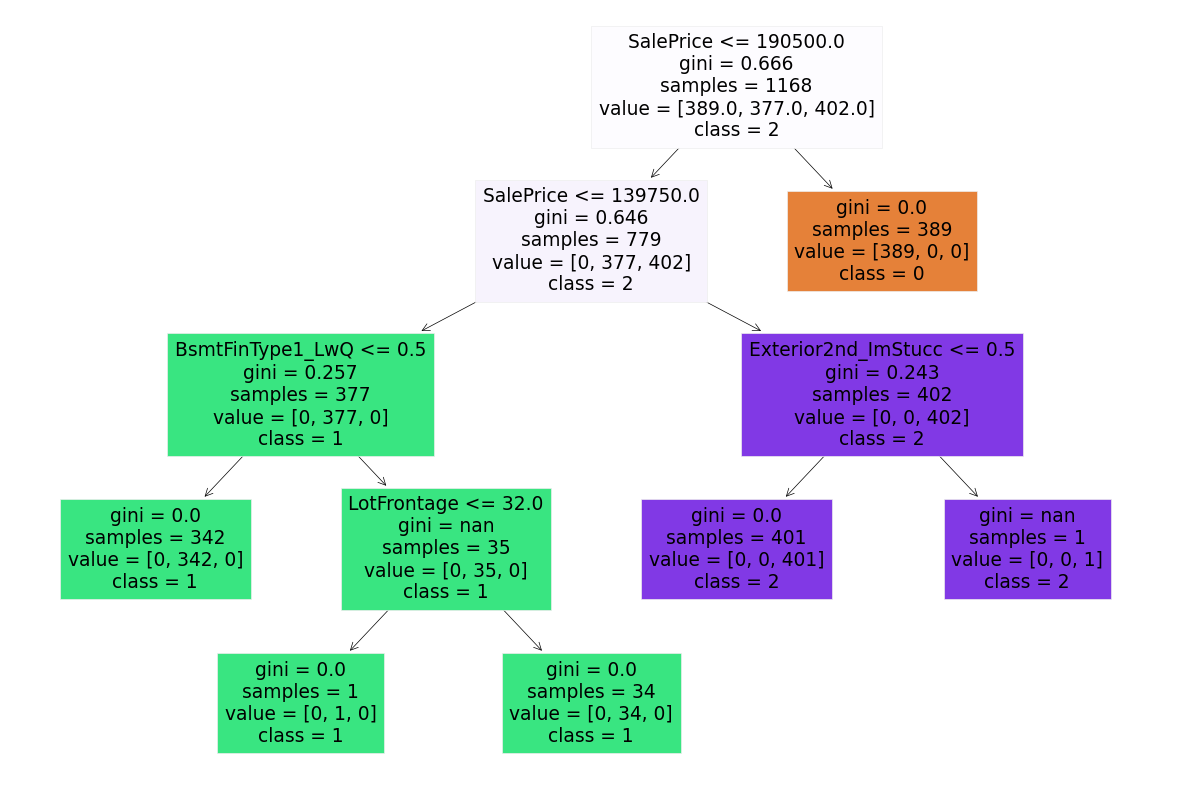

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

random.seed(123)

# Convertir las variables categóricas a una forma numérica
X_dummy = pd.get_dummies(X)

# Ahora puedes dividir tus datos y entrenar tu modelo como antes
X_train, X_test, y_train, y_test = train_test_split(X_dummy, y, test_size=0.2,  random_state=42)

# Entrenar un árbol de clasificación
clf = DecisionTreeClassifier(max_depth=6, random_state=42)
clf.fit(X_train, y_train)

# Graficar el árbol
plt.figure(figsize=(15, 10))
tree.plot_tree(clf, feature_names=X_dummy.columns, class_names=['0','1','2'], filled=True)
plt.show()

In [74]:
y_pred = clf.predict(X_test)
print ("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print ("Precision:", metrics.precision_score(y_test,y_pred,average='weighted') )
print ("Recall: ", metrics.recall_score(y_test,y_pred,average='weighted'))

Accuracy: 1.0
Precision: 1.0
Recall:  1.0


Creamos el gráfico de confusión del árbol de decisión

Matriz de Confusión:
[[ 94   0   0]
 [  0 110   0]
 [  0   0  88]]

Exactitud (Accuracy): 1.00
Precision (Precision): [1. 1. 1.]
Recall (Sensibilidad): [1. 1. 1.]
Puntaje F1: [1. 1. 1.]


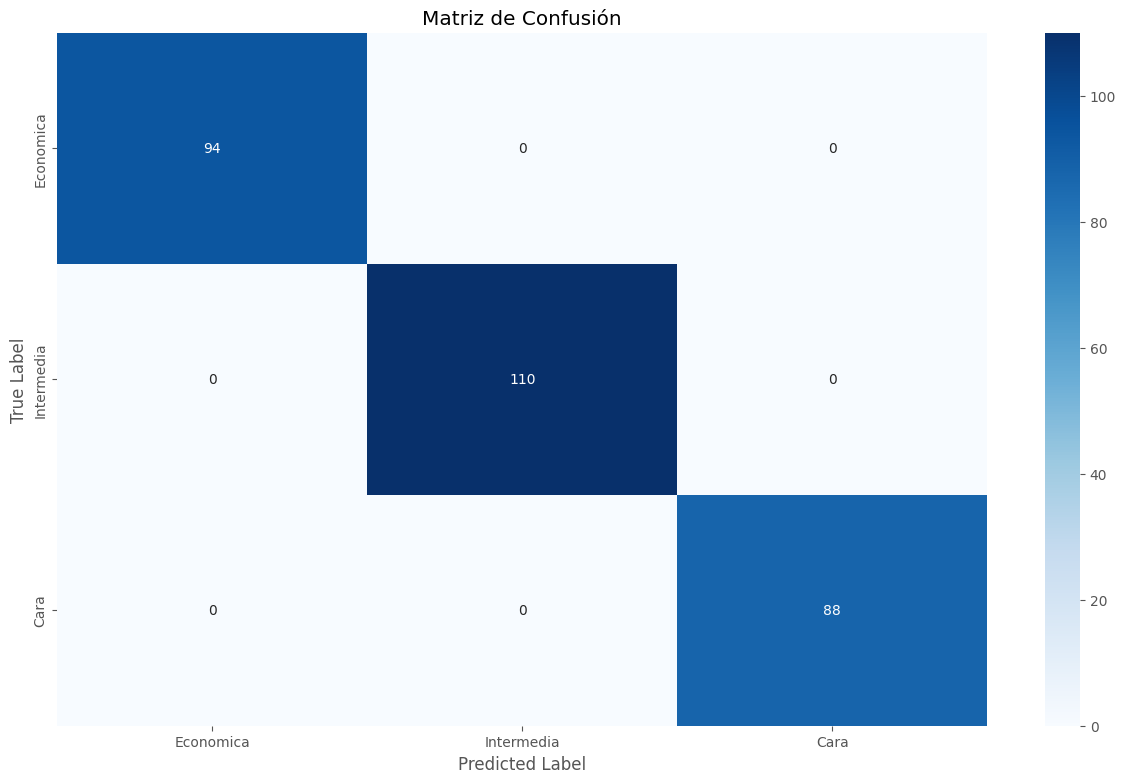

In [75]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns

# Predecir las etiquetas de clase para los datos de prueba
y_pred = clf.predict(X_test)

# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)
f1 = f1_score(y_test, y_pred, average=None)

# Imprimir resultados
print("Matriz de Confusión:")
print(conf_matrix)
print("\nExactitud (Accuracy): {:.2f}".format(accuracy))
print("Precision (Precision): {}".format(precision))
print("Recall (Sensibilidad): {}".format(recall))
print("Puntaje F1: {}".format(f1))

# Visualizar la matriz de confusión
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=['Economica','Intermedia','Cara'], yticklabels=['Economica','Intermedia','Cara'])
plt.title('Matriz de Confusión')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
